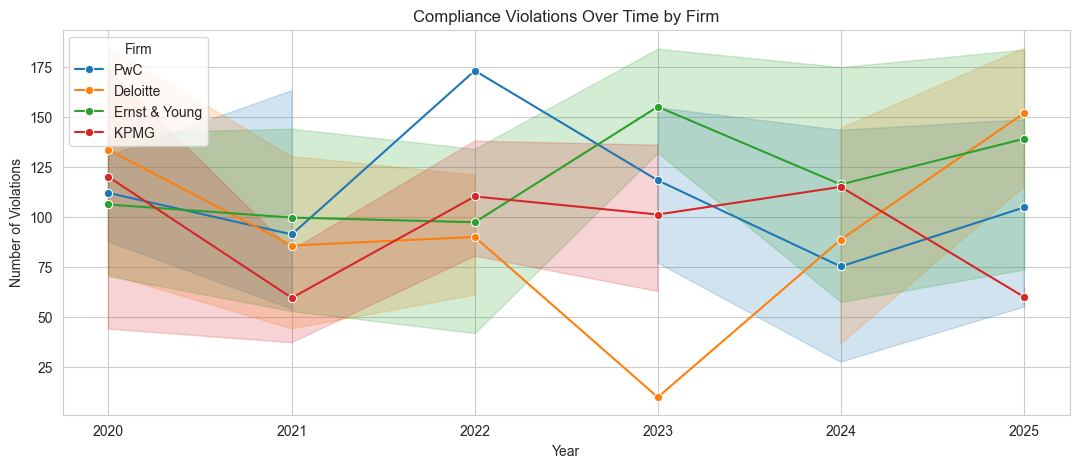

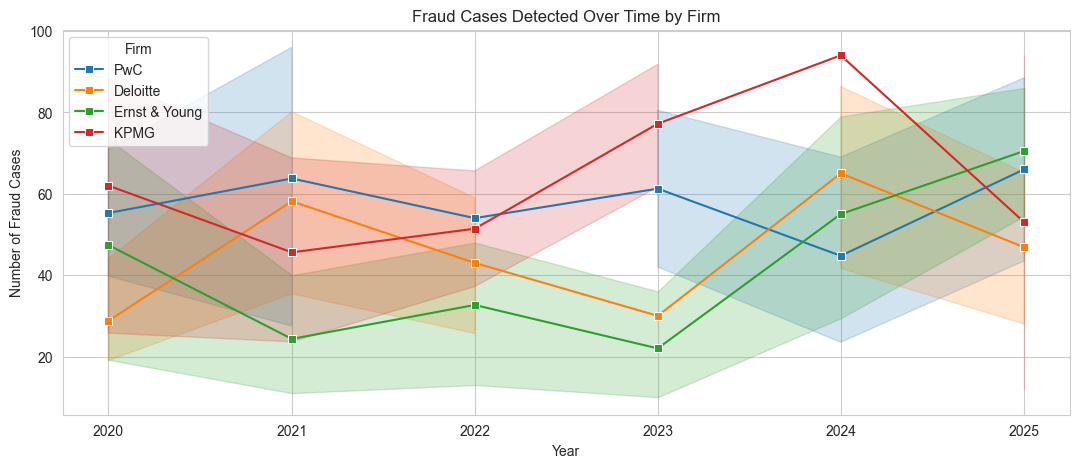

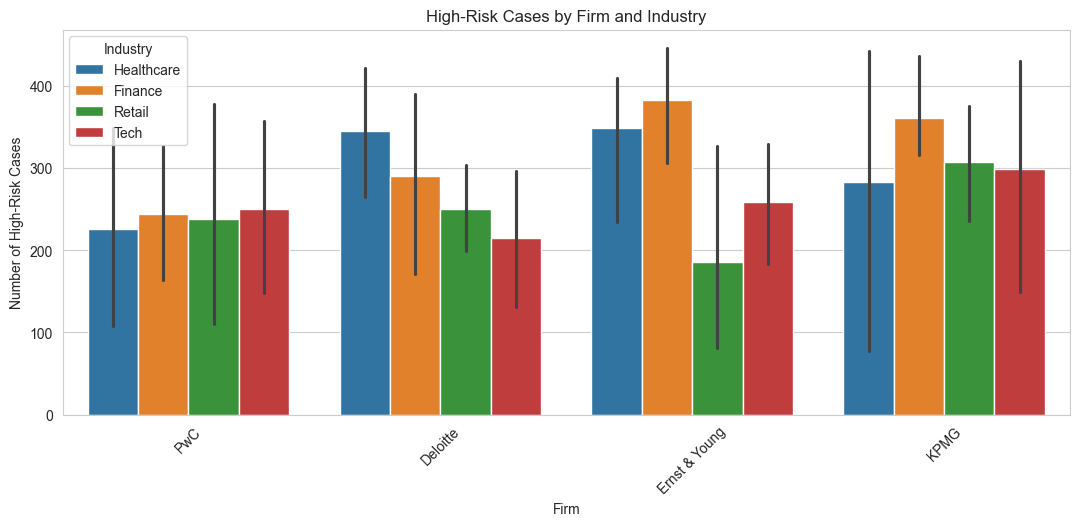

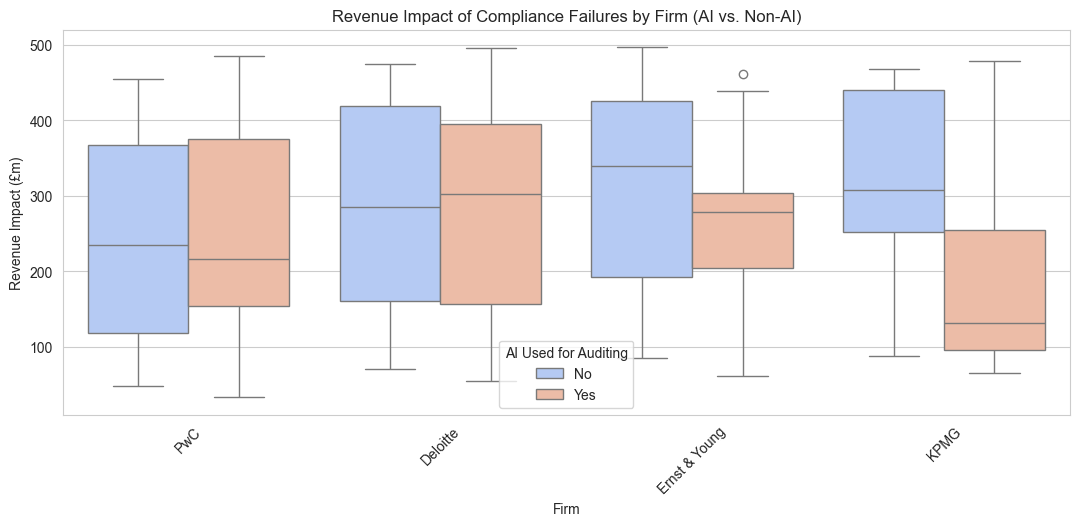

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\Joshua.Mahada\Downloads\archive\big4_financial_risk_compliance.csv")

# Convert Year to datetime
df["Year"] = pd.to_datetime(df["Year"], format="%Y")

# Set Seaborn style
sns.set_style("whitegrid")

# 1️⃣ Compliance Violations & Fraud Cases Over Time
plt.figure(figsize=(13, 5))
sns.lineplot(x=df["Year"], y=df["Compliance_Violations"], hue=df["Firm_Name"], marker="o")
plt.title("Compliance Violations Over Time by Firm")
plt.xlabel("Year")
plt.ylabel("Number of Violations")
plt.legend(title="Firm")
plt.savefig("compliance_violations_trend.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(13, 5))
sns.lineplot(x=df["Year"], y=df["Fraud_Cases_Detected"], hue=df["Firm_Name"], marker="s")
plt.title("Fraud Cases Detected Over Time by Firm")
plt.xlabel("Year")
plt.ylabel("Number of Fraud Cases")
plt.legend(title="Firm")
plt.savefig("fraud_cases_trend.png", bbox_inches='tight')
plt.show()

# 2️⃣ Firm-wise Risk Exposure (High-Risk Cases)
plt.figure(figsize=(13, 5))
sns.barplot(x=df["Firm_Name"], y=df["High_Risk_Cases"], hue=df["Industry_Affected"], dodge=True)
plt.title("High-Risk Cases by Firm and Industry")
plt.xlabel("Firm")
plt.ylabel("Number of High-Risk Cases")
plt.xticks(rotation=45)
plt.legend(title="Industry")
plt.savefig("high_risk_cases_firm.png", bbox_inches='tight')
plt.show()

# 3️⃣ Financial Impact of Compliance Failures
plt.figure(figsize=(13, 5))
sns.boxplot(x=df["Firm_Name"], y=df["Total_Revenue_Impact"], hue=df["AI_Used_for_Auditing"], palette="coolwarm")
plt.title("Revenue Impact of Compliance Failures by Firm (AI vs. Non-AI)")
plt.xlabel("Firm")
plt.ylabel("Revenue Impact (£m)")
plt.xticks(rotation=45)
plt.legend(title="AI Used for Auditing")
plt.savefig("financial_impact_ai.png", bbox_inches='tight')
plt.show()



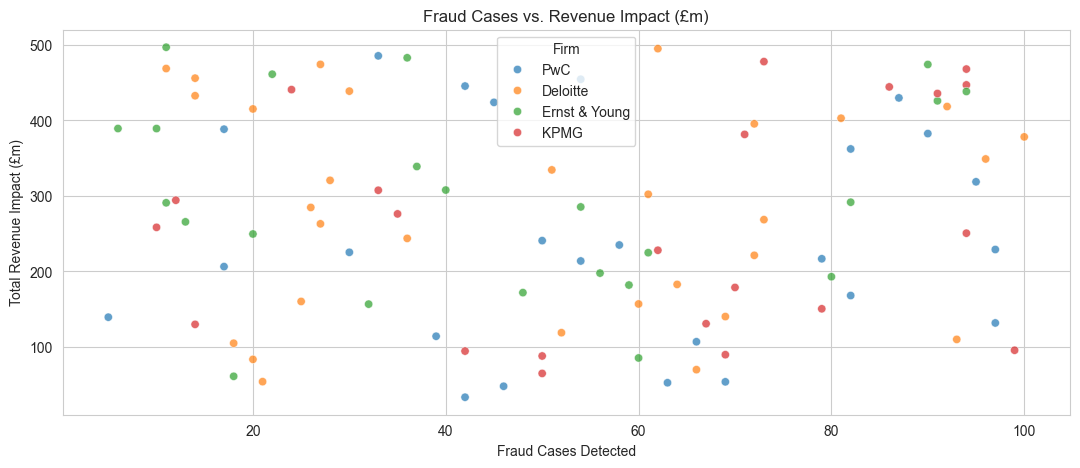

Pearson Correlation (Fraud vs Revenue): 0.013
Spearman Correlation (Fraud vs Revenue): -0.001


C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_18240\3053386114.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["Total_Revenue_Impact"], palette=["red", "blue"])


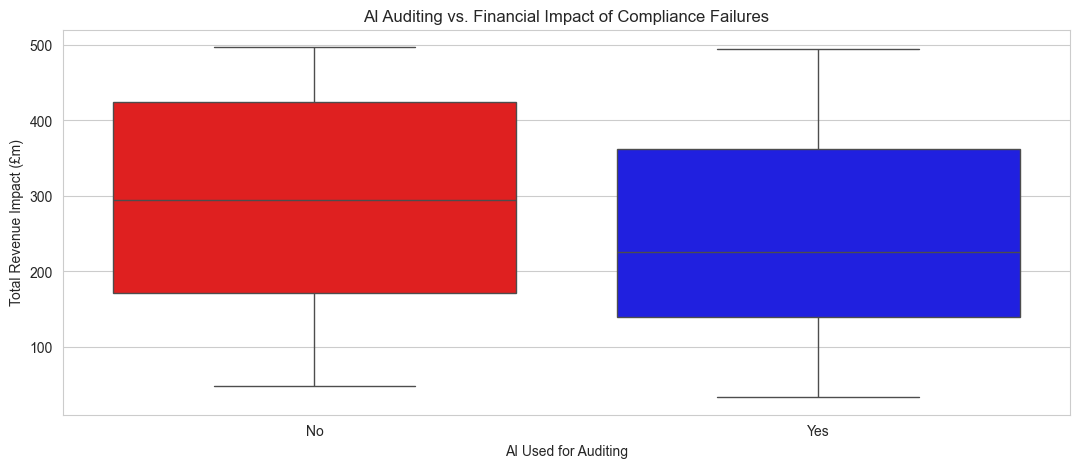

C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_18240\3053386114.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Industry_Affected"], y=df["Total_Revenue_Impact"], estimator=np.mean, ci=None, palette="coolwarm")
C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_18240\3053386114.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Industry_Affected"], y=df["Total_Revenue_Impact"], estimator=np.mean, ci=None, palette="coolwarm")


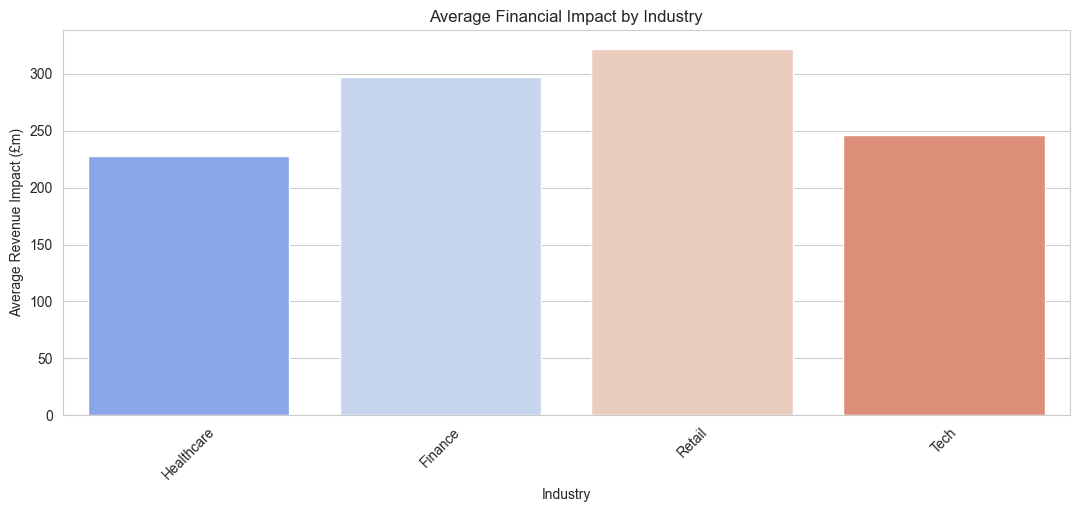

Pearson Correlation (Compliance Violations vs Revenue Impact): 0.113
Pearson Correlation (Audit Effectiveness vs Compliance Violations): 0.084
Pearson Correlation (Client Satisfaction vs Compliance Violations): 0.022


C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_18240\3053386114.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["High_Risk_Cases"], palette=["red", "blue"])


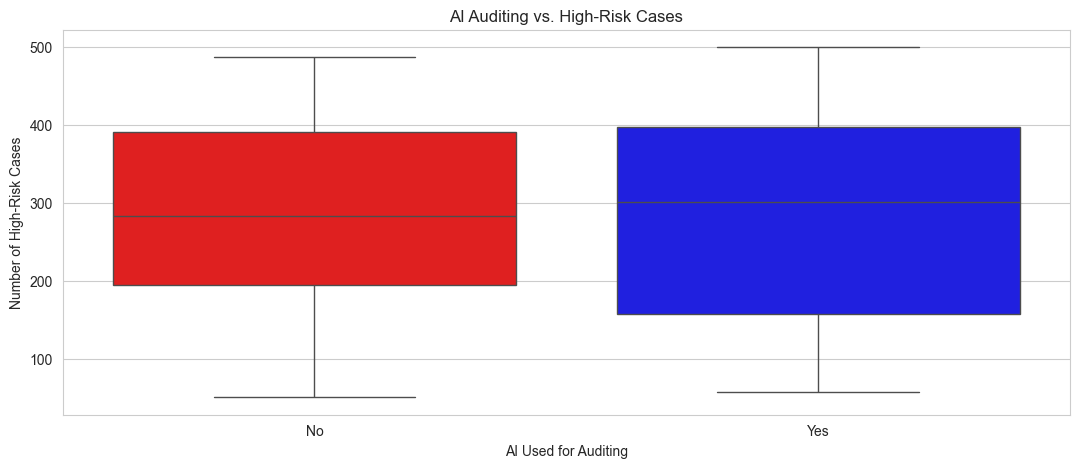

C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_18240\3053386114.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["Audit_Effectiveness_Score"], palette=["red", "blue"])


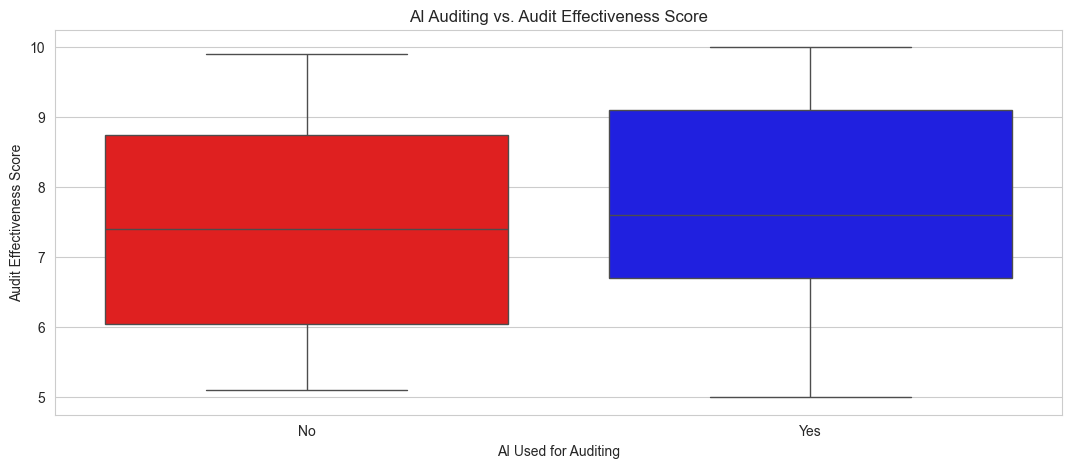

Pearson Correlation (AI Usage vs Audit Effectiveness Score): 0.063


In [6]:

from scipy.stats import pearsonr, spearmanr




# 1️⃣ Correlation Between Fraud Cases & Financial Losses
plt.figure(figsize=(13, 5))
sns.scatterplot(x=df["Fraud_Cases_Detected"], y=df["Total_Revenue_Impact"], hue=df["Firm_Name"], palette="tab10", alpha=0.7)
plt.title("Fraud Cases vs. Revenue Impact (£m)")
plt.xlabel("Fraud Cases Detected")
plt.ylabel("Total Revenue Impact (£m)")
plt.legend(title="Firm")
plt.savefig("fraud_vs_revenue.png", bbox_inches='tight')
plt.show()

# Compute Pearson & Spearman correlation
pearson_corr, _ = pearsonr(df["Fraud_Cases_Detected"], df["Total_Revenue_Impact"])
spearman_corr, _ = spearmanr(df["Fraud_Cases_Detected"], df["Total_Revenue_Impact"])
print(f"Pearson Correlation (Fraud vs Revenue): {pearson_corr:.3f}")
print(f"Spearman Correlation (Fraud vs Revenue): {spearman_corr:.3f}")

# 2️⃣ AI vs. Non-AI Audits: Financial Impact
plt.figure(figsize=(13, 5))
sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["Total_Revenue_Impact"], palette=["red", "blue"])
plt.title("AI Auditing vs. Financial Impact of Compliance Failures")
plt.xlabel("AI Used for Auditing")
plt.ylabel("Total Revenue Impact (£m)")
plt.savefig("ai_vs_financial_impact.png", bbox_inches='tight')
plt.show()

# 3️⃣ Financial Losses by Industry
plt.figure(figsize=(13, 5))
sns.barplot(x=df["Industry_Affected"], y=df["Total_Revenue_Impact"], estimator=np.mean, ci=None, palette="coolwarm")
plt.title("Average Financial Impact by Industry")
plt.xlabel("Industry")
plt.ylabel("Average Revenue Impact (£m)")
plt.xticks(rotation=45)
plt.savefig("industry_financial_impact.png", bbox_inches='tight')
plt.show()


# 4️⃣ Additional Correlations
# Compliance Violations vs. Revenue Impact
comp_violations_corr, _ = pearsonr(df["Compliance_Violations"], df["Total_Revenue_Impact"])
print(f"Pearson Correlation (Compliance Violations vs Revenue Impact): {comp_violations_corr:.3f}")

# Audit Effectiveness Score vs. Compliance Violations
audit_eff_corr, _ = pearsonr(df["Audit_Effectiveness_Score"], df["Compliance_Violations"])
print(f"Pearson Correlation (Audit Effectiveness vs Compliance Violations): {audit_eff_corr:.3f}")

# Client Satisfaction Score vs. Compliance Violations
client_satis_corr, _ = pearsonr(df["Client_Satisfaction_Score"], df["Compliance_Violations"])
print(f"Pearson Correlation (Client Satisfaction vs Compliance Violations): {client_satis_corr:.3f}")

# 5️⃣ AI & Audit Efficiency Analysis
# AI Auditing and High-Risk Cases
plt.figure(figsize=(13, 5))
sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["High_Risk_Cases"], palette=["red", "blue"])
plt.title("AI Auditing vs. High-Risk Cases")
plt.xlabel("AI Used for Auditing")
plt.ylabel("Number of High-Risk Cases")
plt.savefig("ai_vs_high_risk_cases.png", bbox_inches='tight')
plt.show()

# AI Auditing and Audit Effectiveness Score
plt.figure(figsize=(13, 5))
sns.boxplot(x=df["AI_Used_for_Auditing"], y=df["Audit_Effectiveness_Score"], palette=["red", "blue"])
plt.title("AI Auditing vs. Audit Effectiveness Score")
plt.xlabel("AI Used for Auditing")
plt.ylabel("Audit Effectiveness Score")
plt.savefig("ai_vs_audit_effectiveness.png", bbox_inches='tight')
plt.show()

# Correlation: AI Usage and Audit Effectiveness
ai_audit_corr, _ = pearsonr(df["Audit_Effectiveness_Score"], df["AI_Used_for_Auditing"].apply(lambda x: 1 if x == "Yes" else 0))
print(f"Pearson Correlation (AI Usage vs Audit Effectiveness Score): {ai_audit_corr:.3f}")




In [3]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt



# Convert categorical columns
categorical_features = ["Firm_Name", "Industry_Affected", "AI_Used_for_Auditing"]
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
categorical_encoded.columns = encoder.get_feature_names_out()

# Standardise numerical features
numerical_features = ["Total_Audit_Engagements", "Compliance_Violations", "Fraud_Cases_Detected", "Total_Revenue_Impact", "Audit_Effectiveness_Score", "Client_Satisfaction_Score"]
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

# Combine processed features
X = pd.concat([numerical_scaled, categorical_encoded], axis=1)
y = df["High_Risk_Cases"] > df["High_Risk_Cases"].median()  # Convert to binary classification (High-Risk or Not)
y = y.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Hyperparameter Tuning for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("Optimised XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 2️⃣ Hyperparameter Tuning for Neural Network
def build_nn_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_nn_model, objective='val_accuracy', max_epochs=20, factor=3, directory='tuning_dir', project_name='nn_tuning')
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
nn_model = tuner.hypermodel.build(best_hps)
nn_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
print("Optimised Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


C:\Users\Joshua.Mahada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Optimised XGBoost Accuracy: 0.55
ROC-AUC Score: 0.5208333333333334
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.43      0.38      0.40         8

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.54      0.55      0.54        20

Reloading Tuner from tuning_dir\nn_tuning\tuner0.json


C:\Users\Joshua.Mahada\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.5165 - loss: 0.6892 - val_accuracy: 0.7000 - val_loss: 0.6258
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5736 - loss: 0.6486 - val_accuracy: 0.7500 - val_loss: 0.6245
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4932 - loss: 0.7254 - val_accuracy: 0.7000 - val_loss: 0.6250
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5264 - loss: 0.7078 - val_accuracy: 0.7000 - val_loss: 0.6269
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5372 - loss: 0.6904 - val_accuracy: 0.7000 - val_loss: 0.6290
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7054 - loss: 0.6168 - val_accuracy: 0.7000 - val_loss: 0.6303
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5705 - loss: 0.6755 - val_accuracy: 0.7000 - val_loss: 0.6332
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6403 - loss: 0.6133 - val_accuracy: 0.7000 - val_loss: 0.6341